In [3]:
import pandas as pd
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
from sklearn.model_selection import train_test_split

x,y = df.drop('target',axis=1),df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state = 9)

### Scale-Insensitive


In [5]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [6]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

### Scale-sensitive models

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [10]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train_scaled,y_train)

LogisticRegression()

In [11]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled,y_train)

SVC()

In [12]:
forest.score(x_test,y_test)

0.9853658536585366

In [13]:
nb_clf.score(x_test,y_test)

0.8463414634146341

In [14]:
gb_clf.score(x_test,y_test)

0.9707317073170731

In [15]:
knn.score(x_test_scaled,y_test)

0.8536585365853658

In [16]:
svc.score(x_test_scaled,y_test)

0.9341463414634147

In [17]:
log.score(x_test_scaled,y_test)

0.8731707317073171

In [18]:
from sklearn.metrics import recall_score

y_pred = forest.predict(x_test)
print('forest:',recall_score(y_test,y_pred))

y_pred = nb_clf.predict(x_test)
print('nbclf:',recall_score(y_test,y_pred))

y_pred = gb_clf.predict(x_test)
print('gbclf:',recall_score(y_test,y_pred))

y_pred = knn.predict(x_test_scaled)
print('knn:',recall_score(y_test,y_pred))

y_pred = log.predict(x_test_scaled)
print('log:',recall_score(y_test,y_pred))

y_pred = svc.predict(x_test_scaled)
print('svc:',recall_score(y_test,y_pred))

forest: 0.9859154929577465
nbclf: 0.9014084507042254
gbclf: 0.9859154929577465
knn: 0.8732394366197183
log: 0.92018779342723
svc: 0.9530516431924883


Text(0.5, 1.0, 'ROC curve')

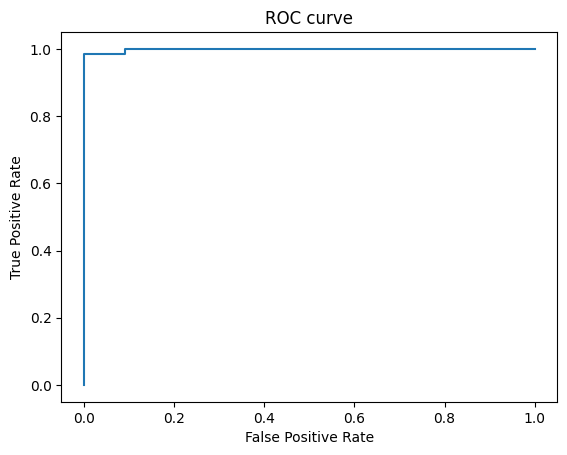

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = forest.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')


In [21]:
roc_auc_score(y_test,y_prob)

np.float64(0.9987130907271037)

### Hyper-parameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100,200,500,600,700],
              #'max_depth':[None,10,20,30],
              #'min_samples_split':[2,5,10],
              #'min_samples_leaf':[1,2,4],
              #'max_features':['sqrt','log2',None]
}
forest = RandomForestClassifier(n_jobs=-1, random_state=9)
grid_search = GridSearchCV(forest,param_grid,cv=3, n_jobs=-1)

In [23]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 500, 600, 700]})

In [24]:
best_forest = grid_search.best_estimator_

In [25]:
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

In [26]:
best_forest.score(x_test,y_test)

0.9853658536585366

Text(0.5, 1.0, 'ROC curve')

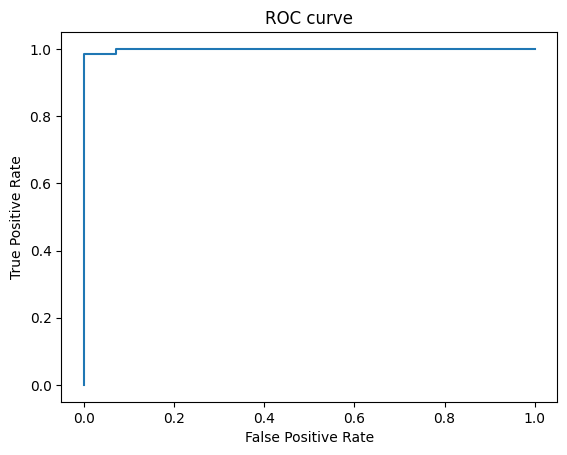

In [27]:
y_prob = best_forest.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')


In [28]:
y_pred = best_forest.predict(x_test)
print('forest:',recall_score(y_test,y_pred))

forest: 0.9859154929577465


### Feature importances

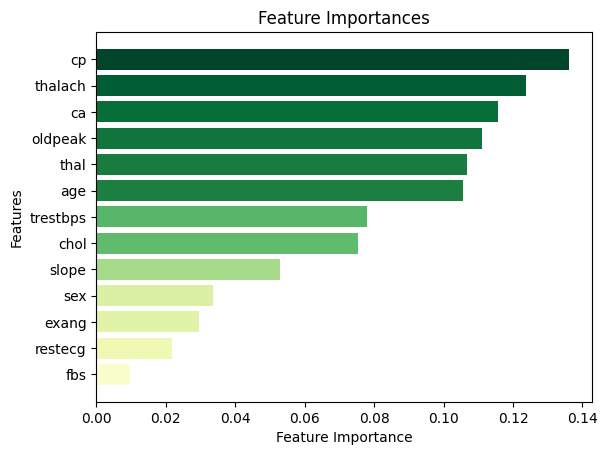

In [29]:
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / sorted_importances.max())
plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

<Axes: >

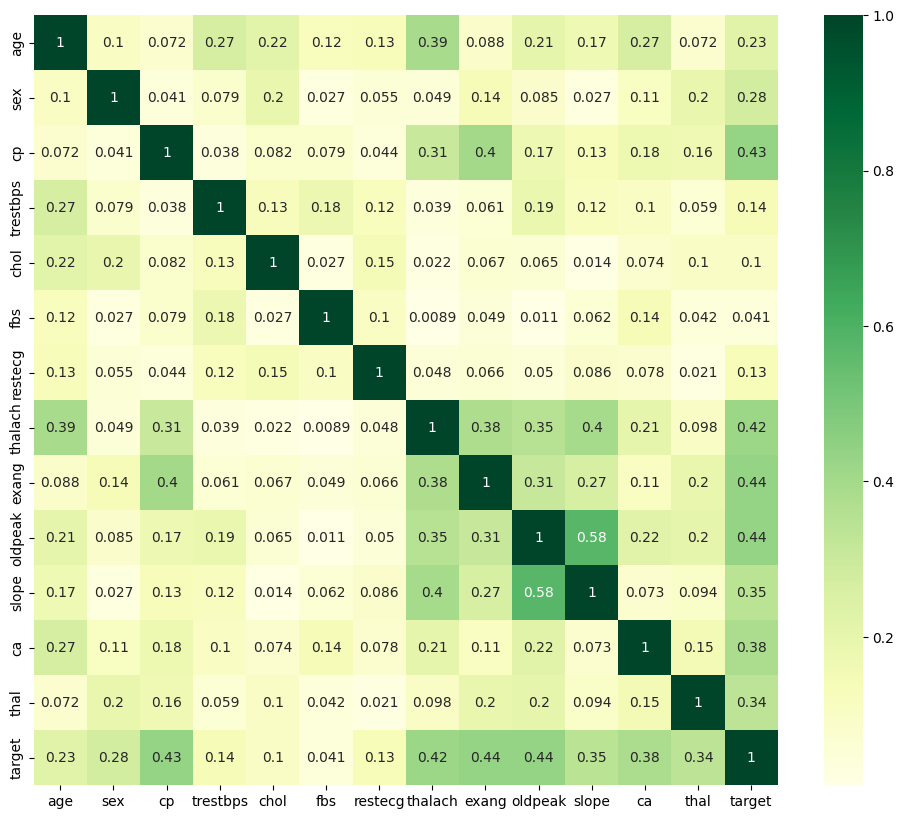

In [84]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()),annot=True, cmap='YlGn')